In [1]:
%matplotlib inline
from equadratures import *
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<h1> The Padua Points </h1>

The objective of this note is to demonstrate how various linear algebra (and convex optimization) heuristics can be used for finding the Gauss quadrature points!

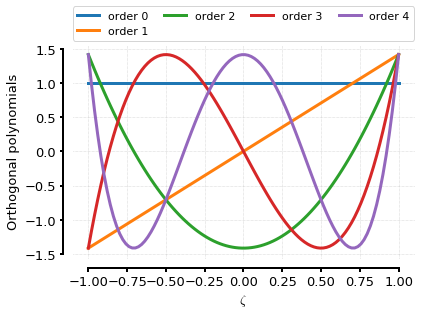

15


In [2]:
order_tensor = 4
x1 = Parameter(distribution='Chebyshev', order=order_tensor, lower=-1., upper=1., endpoints=True)
x2 = Parameter(distribution='Chebyshev', order=order_tensor+1, lower=-1., upper=1., endpoints=True)
totalorder = Basis('Total order', [order_tensor, order_tensor])
u = np.linspace(-1., 1., 100)
P, _ = x1._getOrthoPoly(u)
polynomialplot(P, u)
print totalorder.cardinality

In [3]:
Polyobject = Polylsq(parameters=[x1, x2], basis=totalorder, mesh='Tensor', optimization='Newton', oversampling=1.0)
pfull, wfull = Polyobject.getTensorQuadratureRule()
print np.sum(wfull)

0.9999999999999994


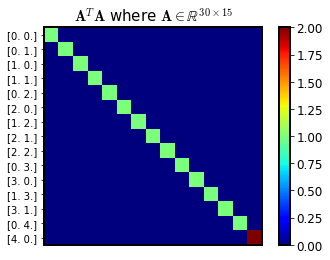

In [4]:
M = np.dot(Polyobject.A.T , Polyobject.A)
mm, nn = Polyobject.A.shape
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(M, interpolation='nearest', cmap=cm.jet, vmin=0., vmax=2.0)
plt.colorbar()
frame1 = plt.gca()
ax.set_xticks([])
frame1.axes.xaxis.set_ticklabels([])
ticks = []
for i in range(0, totalorder.cardinality):
    ticks.append(str(totalorder.elements[i,:]))
plt.yticks(np.arange(totalorder.cardinality), ticks, fontsize=10)
titlestring = r'$\mathbf{A}^T \mathbf{A}$ where $\mathbf{A}\in \mathbb{R}^{%s \times %s}$'%(mm, nn)
plt.title(titlestring,fontsize=15)
plt.savefig('Padua.eps' , dpi=200)
plt.show()

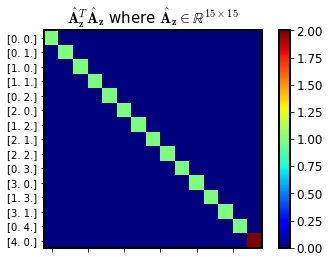

In [5]:
M = np.dot(Polyobject.Az.T , Polyobject.Az)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(M, interpolation='nearest', cmap=cm.jet, vmin=0., vmax=2.0)
plt.colorbar()
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
ticks = []
for i in range(0, totalorder.cardinality):
    ticks.append(str(totalorder.elements[i,:]))
plt.yticks(np.arange(totalorder.cardinality), ticks, fontsize=10)
mm, nn = Polyobject.Az.shape
titlestring = r'$\hat{\mathbf{A}}^T_{\mathbf{z}} \hat{\mathbf{A}}_{\mathbf{z}} $ where $\hat{\mathbf{A}}_{\mathbf{z}}\in \mathbb{R}^{%s \times %s}$'%(mm, nn)
plt.title(titlestring,fontsize=15)
plt.savefig('Newton_Padua.eps' , dpi=200)
plt.show()

In [6]:
print np.diag(Polyobject.Wz)**2
print Polyobject.quadratureWeights
quad_pts = Polyobject.quadraturePoints
P = Polyobject.getPolynomial(quad_pts)
poly40 = P[totalorder.cardinality-1,:]
poly04 = P[totalorder.cardinality-2,:]

[0.05  0.05  0.025 0.05  0.1   0.1   0.1   0.1   0.05  0.05  0.1   0.1
 0.05  0.05  0.025]
[0.05  0.05  0.025 0.05  0.1   0.1   0.1   0.1   0.05  0.05  0.1   0.1
 0.05  0.05  0.025]


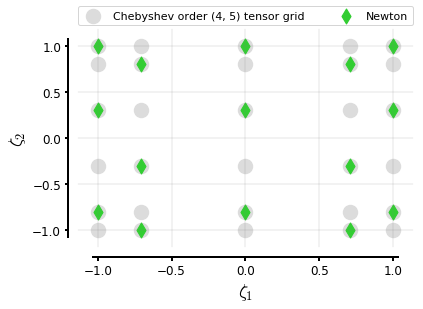

In [7]:
label_cheby = 'Chebyshev order (%s, %s) tensor grid'%(order_tensor, order_tensor+1)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(pfull[:,0], pfull[:,1], marker='o', s=180,  color='gainsboro',linewidth=2., label=label_cheby)
plt.scatter(Polyobject.quadraturePoints[:,0], Polyobject.quadraturePoints[:,1], marker='d', s=110,  color='limegreen',linewidth=1.2, label=Polyobject.optimization)
adjust_spines(ax, ['left', 'bottom'])
plt.grid(b=True, which='major', color='gray', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='-', linewidth=0.2)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=11)
frame1 = plt.gca()
plt.xlabel('$\zeta_1$')
plt.ylabel('$\zeta_2$')
plt.savefig('Points.eps', dpi=200, bbox_inches='tight', pad_inches=0.1)
plt.show()